<a href="https://colab.research.google.com/github/Rosss14/cell_detection_project/blob/main/DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejecutando el bloque de código siguiente se puede subir una imagen del sistema.

In [1]:
from google.colab import files 

upl = files.upload()

Saving TCGA-AR-A0U4-DX1_id-5ea40a88ddda5f8398990ccf_left-42391_top-71042_bottom-71339_right-42703.png to TCGA-AR-A0U4-DX1_id-5ea40a88ddda5f8398990ccf_left-42391_top-71042_bottom-71339_right-42703.png


Configuración del entorno

In [2]:
!git clone --depth 1 https://github.com/tensorflow/models
!pip install -q kaggle

Cloning into 'models'...
remote: Enumerating objects: 3843, done.
remote: Counting objects: 100% (3843/3843), done.
remote: Compressing objects: 100% (2955/2955), done.
remote: Total 3843 (delta 1109), reused 1946 (delta 837), pack-reused 0
Receiving objects: 100% (3843/3843), 49.59 MiB | 17.88 MiB/s, done.
Resolving deltas: 100% (1109/1109), done.


In [3]:
%%bash
sudo apt install -y protobuf-compiler
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Reading package lists...
Building dependency tree...
Reading state information...
protobuf-compiler is already the newest version (3.6.1.3-2ubuntu5.2).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Inferencia 

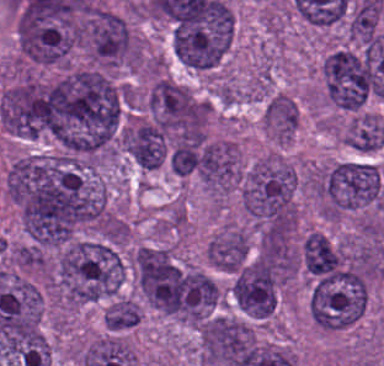

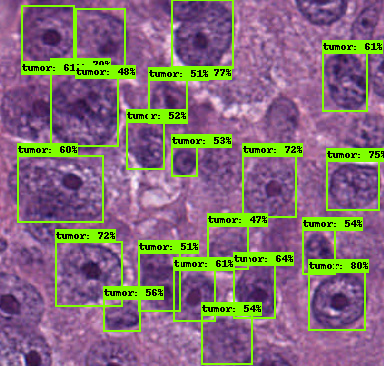

In [4]:
import os
import shutil
from IPython.display import display

os.environ['KAGGLE_USERNAME'] = "rostyslavzavoiko"
os.environ['KAGGLE_KEY'] = "1ce00ca61f599bd12bd9f706b048c213"

os.system('git clone https://github.com/Rosss14/cell_detection_project.git')
shutil.move('cell_detection_project/Utils.py', 'Utils.py')

from Utils import *

index = 1    # Un valor entre 0 y 3, para elegir el modelo

model_dirs = ['EfficientDet_D0', 'EfficientDet_D2', 'CenterNet_Hourglass-104', 'SSD_MobileNet_V2_FPNLite']
scores = [0.36, 0.33, 0.29, 0.41]

model_dir = model_dirs[index]    # Elegir el modelo de la lista 
score = scores[index]            # Elegir el score

if index==2: # CenterNet Hourglass pesa más que otros modelos. Se descargan sus checkpoints y se exporta el modelo

    os.system('kaggle datasets download -d rostyslavzavoiko/train-checkpoints --unzip')

    os.system('python models/research/object_detection/exporter_main_v2.py --pipeline_config_path=pipeline.config --trained_checkpoint_dir=training --output_directory=model_exported')

    model_path = 'model_exported/saved_model'

else:
    model_path = 'cell_detection_project/Modelos_reentrenados/' + model_dir + '/saved_model'

modelo = tf.saved_model.load(model_path)

imagen = 'TCGA-AR-A0U4-DX1_id-5ea40a88ddda5f8398990ccf_left-42391_top-71042_bottom-71339_right-42703.png'

imagen_detectada = detectar_nucleos(modelo, imagen, score)

display(Image.open(imagen))
display(Image.open(imagen_detectada))